# 911 Calls Capstone Project



* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



## Data and Setup

**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

**Read in the csv file as a dataframe called df**

In [3]:
df = pd.read_csv('911.csv')

**Check the info() of the df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.isna().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [7]:

df['zip'] = df['zip'].astype(str)
a=df['zip'].value_counts()
a[:5]

nan        12855
19401.0     6979
19464.0     6643
19403.0     4854
19446.0     4748
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [8]:
b=df['twp'].value_counts()
b[:5]


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [9]:
df['title'].nunique()

110

## Creating new features

** Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [10]:
df['title'].value_counts()

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
EMS: DISABLED VEHICLE                  1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: DIABETIC EMERGENCY               1
EMS: BOMB DEVICE FOUND                 1
Fire: SYNCOPAL EPISODE                 1
Name: title, Length: 110, dtype: int64

In [11]:
a = df['title'].unique()
df['Reason']= df['title'].apply(lambda x:x.split(':')[0])

df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

**What is the most common Reason for a 911 call based off of this new column?**

In [12]:
a = df['Reason'].value_counts()
a[0:1]

EMS    48877
Name: Reason, dtype: int64

**Use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reason', ylabel='count'>

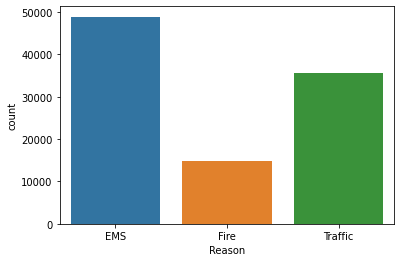

In [13]:
sns.countplot(x=df['Reason'])

In [14]:
df['timeStamp'].dtype

dtype('O')

**The timestamps are still strings. Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df['timeStamp'].dtype

dtype('<M8[ns]')

In [16]:


df['Reason']= df['title'].apply(lambda x:x.split(':')[0])

In [17]:
df['timeStamp'][0]

Timestamp('2015-12-10 17:40:00')

In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS



**Use .apply() to create 3 new columns called Hour, Month, and Day of Week.Create the columns based off of the timeStamp column**

In [19]:
df['Hour']=df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['Day'] = df['timeStamp'].dt.day

In [20]:
df['day_of_week']=df['timeStamp'].dt.dayofweek

In [21]:
df['Day'].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9])

**The Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    

In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
df['day_of_week']=df['day_of_week'].map(dmap)

**Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

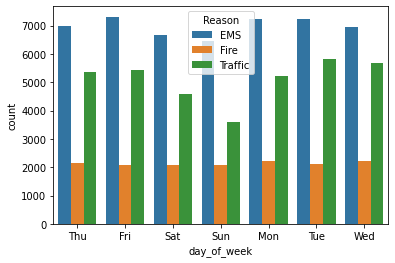

In [24]:
sns.countplot(x=df['day_of_week'],hue=df['Reason'])

In [25]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8])

**Now do the same for Month:**

In [26]:
dmonth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
         10:'Oct',11:'Nov',12:'Dec'}

df['Month'] = df['Month'].map(dmonth)

<AxesSubplot:xlabel='Month', ylabel='count'>

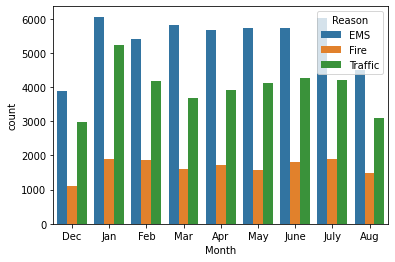

In [27]:
sns.countplot(x=df['Month'],hue=df['Reason'])

**Create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [28]:


bymonth=df.groupby('Month').count()
# del df['bym']
# del df['bm']



In [29]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,day_of_week
Month,,,,,,,,,,,,,
Apr,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326
Aug,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078,9078
Dec,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969,7969
Feb,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467
Jan,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205
July,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137,12137
June,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786,11786
Mar,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101
May,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423


**create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot:ylabel='Day'>

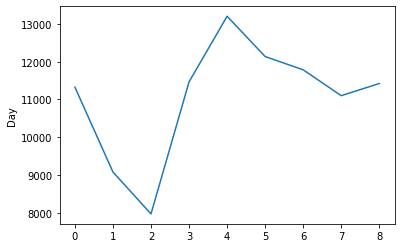

In [34]:
sns.lineplot(y=bymonth['Day'],x=bymonth.index)

In [35]:
bymonth.reset_index()

,index,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,day_of_week
0,0,Apr,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326
1,1,Aug,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078,9078
2,2,Dec,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969,7969
3,3,Feb,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467
4,4,Jan,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205
5,5,July,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137,12137
6,6,June,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,7,Mar,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101
8,8,May,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423


**use seaborn's lmplot() to create a linear fit on the number of calls per month.You may need to reset the index to a column.**

In [36]:
bymonth.reset_index(inplace = True)

In [37]:
dmonths = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'July':7,'Aug':8,'Sep':9,
         'Oct':10,'Nov':11,'Dec':12}


In [38]:
bymonth['Month'] = bymonth['Month'].map(dmonths)

In [39]:


bymonth

,index,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day,day_of_week
0,0,4,11326,11326,11326,11326,11326,11326,11323,11283,11326,11326,11326,11326,11326
1,1,8,9078,9078,9078,9078,9078,9078,9073,9025,9078,9078,9078,9078,9078
2,2,12,7969,7969,7969,7969,7969,7969,7963,7916,7969,7969,7969,7969,7969
3,3,2,11467,11467,11467,11467,11467,11467,11465,11396,11467,11467,11467,11467,11467
4,4,1,13205,13205,13205,13205,13205,13205,13203,13096,13205,13205,13205,13205,13205
5,5,7,12137,12137,12137,12137,12137,12137,12133,12088,12137,12137,12137,12137,12137
6,6,6,11786,11786,11786,11786,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,7,3,11101,11101,11101,11101,11101,11101,11092,11059,11101,11101,11101,11101,11101
8,8,5,11423,11423,11423,11423,11423,11423,11420,11378,11423,11423,11423,11423,11423


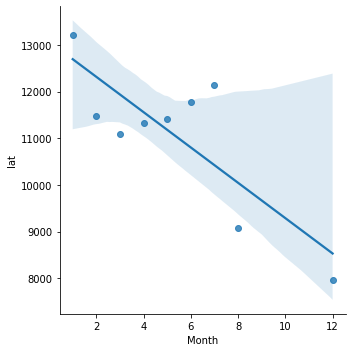

In [40]:
sns.lmplot(x = 'Month', y= 'lat', data = bymonth)

**Create a new column called 'Date' that contains the date from the timeStamp column.Use apply along with the .date() method.** 

In [42]:
df['Date']=df['timeStamp'].dt.date
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,day_of_week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Dec,10,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Dec,10,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Dec,10,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Dec,10,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Dec,10,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<AxesSubplot:xlabel='Date', ylabel='count'>

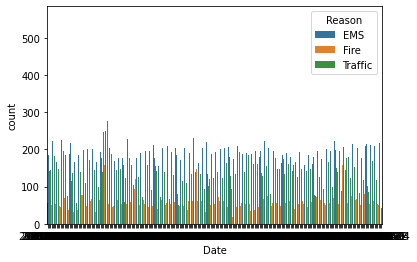

In [44]:
df.groupby('Date').count()

sns.countplot(x=df['Date'],hue=df['Reason'])

**Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [45]:
df1=df['Reason']=='EMS'
df2=df['Reason']=='Fire'
df3=df['Reason']=='Traffic'

<AxesSubplot:xlabel='Reason', ylabel='count'>

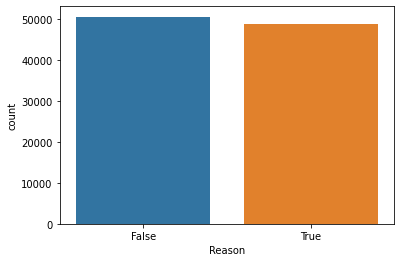

In [46]:
sns.countplot(x=df1)

<AxesSubplot:xlabel='Reason', ylabel='count'>

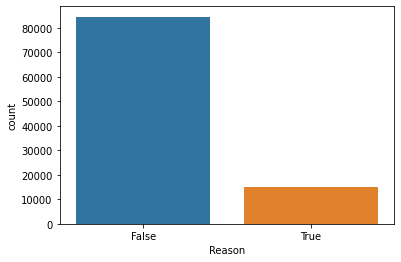

In [47]:
sns.countplot(x=df2)

<AxesSubplot:xlabel='Reason', ylabel='count'>

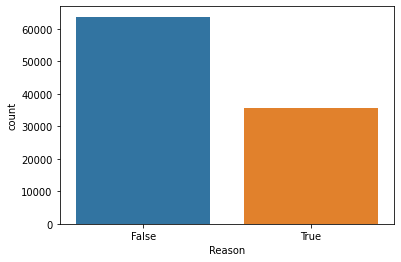

In [48]:
sns.countplot(x=df3)

**creating  heatmaps with seaborn and our data.First,restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [49]:
bymonth=df.groupby('Month').count()


new=df.pivot_table(values='lat',index='day_of_week',columns='Hour')
new

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,40.169621,40.157687,40.164340,40.160398,40.176780,40.174464,40.173802,40.156445,40.156771,40.161332,...,40.161011,40.151510,40.153237,40.156842,40.154495,40.155973,40.160767,40.162000,40.162012,40.166369
Mon,40.162162,40.161162,40.154063,40.174832,40.176374,40.175983,40.169440,40.160994,40.158522,40.160310,...,40.156284,40.156798,40.157361,40.155825,40.152469,40.153197,40.164290,40.157355,40.163505,40.159322
Sat,40.165790,40.165149,40.141154,40.148065,40.169937,40.177790,40.165542,40.162556,40.162658,40.170433,...,40.158426,40.160975,40.156457,40.153198,40.158696,40.160689,40.162264,40.164119,40.164187,40.165373
Sun,40.159093,40.155310,40.172051,40.159717,40.166284,40.159375,40.158364,40.158295,40.158953,40.165268,...,40.159051,40.166048,40.162271,40.167646,40.157766,40.157333,40.170696,40.162224,40.169060,40.164085
Thu,40.169482,40.163608,40.159372,40.171503,40.155952,40.161442,40.169035,40.157636,40.155030,40.148767,...,40.162824,40.152389,40.158809,40.164677,40.158404,40.162961,40.167278,40.163672,40.163334,40.155144
Tue,40.152128,40.153148,40.159789,40.165538,40.168159,40.161501,40.169410,40.164229,40.158545,40.154270,...,40.149995,40.154025,40.159972,40.157298,40.155406,40.160462,40.174660,40.168725,40.163557,40.162079
Wed,40.156905,40.165360,40.169074,40.169320,40.171085,40.162169,40.166772,40.157906,40.164154,40.158328,...,40.163060,40.159714,40.156123,40.153773,40.158612,40.151023,40.162469,40.168566,40.165110,40.163565


**Now create a HeatMap using this new DataFrame.**

<AxesSubplot:xlabel='Hour', ylabel='day_of_week'>

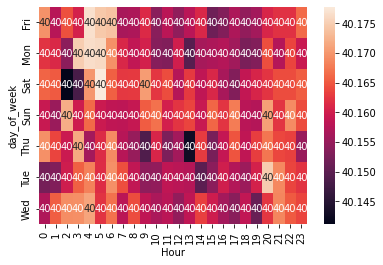

In [52]:
sns.heatmap(new,annot=True)

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [54]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day,day_of_week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Dec,10,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Dec,10,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,Dec,10,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Dec,10,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Dec,10,Thu,2015-12-10


In [55]:
nw_m=df.pivot_table(values='lat',index='day_of_week',columns='Month')


<AxesSubplot:xlabel='Month', ylabel='day_of_week'>

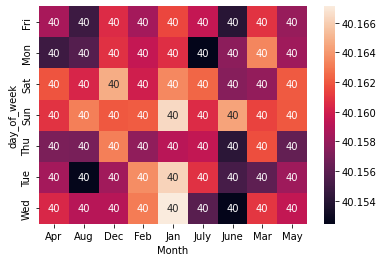

In [56]:
sns.heatmap(nw_m,annot=True)


# Great Job!